<a href="https://colab.research.google.com/github/singhnayaab/hww/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.fft import fft, ifft, fftfreq

## **QUESTION 1**

In [ ]:
beatingwaves = loadmat('/content/drive/MyDrive/BeatingWaves.mat', squeeze_me = True)
#loading time

Text(0, 0.5, 'y')

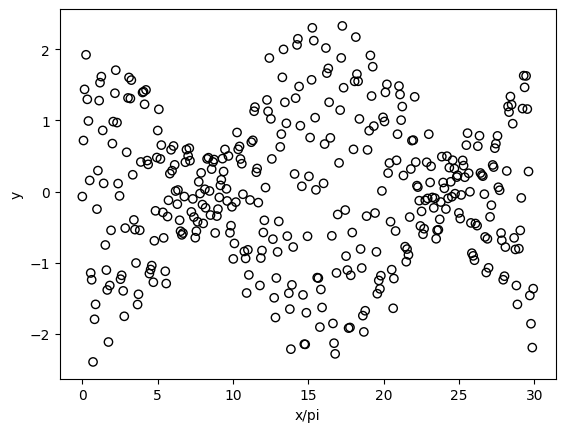

In [ ]:

#printing raw data out
x = beatingwaves['x_noisy']
y = beatingwaves['y_noisy']
plt.scatter(x/np.pi, y, color='black', facecolors='none', edgecolors='black')
plt.xlabel('x/pi')
plt.ylabel('y')

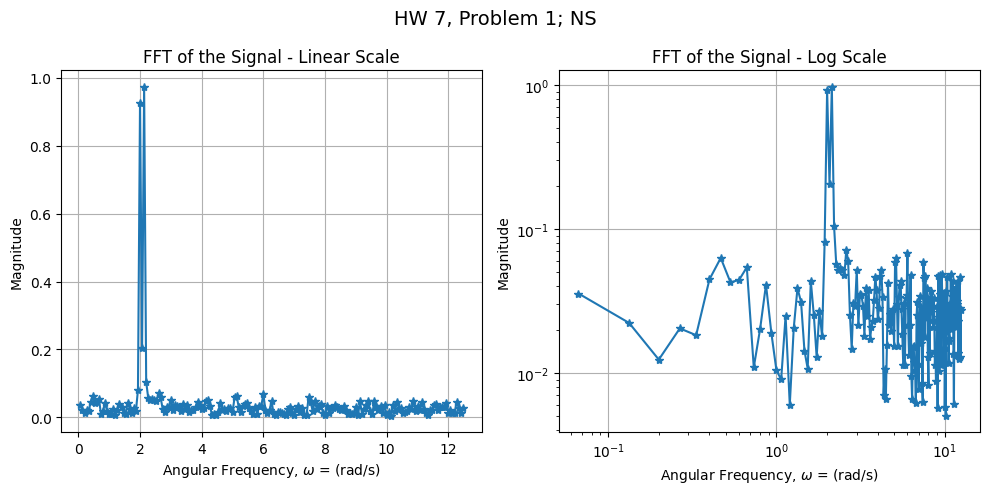

Max Angular Frequencies of the two sine waves: [1.99995288 2.13328308]


In [ ]:
fs = (x[-1]-x[0])/(len(x)-1) #sampling freq

fft_result = fft(y) #fft time

fft_mag = 2*np.abs(fft_result)/len(y)
#calculating magnitude

fft_freq = fftfreq(len(y), fs)
#frequencies in Hz

omega = 2*np.pi* fft_freq
#converting to angular freq


L = np.arange(1, len(x) // 2)


### Figure ###

fig, axs = plt.subplots(1,2, figsize=(10, 5))

# Linear scale (Mag v/s angular freq)
axs[0].plot(omega[L], fft_mag[L], marker='*')
axs[0].set_xlabel('Angular Frequency, $\omega$ = (rad/s)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('FFT of the Signal - Linear Scale')
axs[0].grid()

# Log scale (Mag v/s angular freq)
axs[1].loglog(omega[L], fft_mag[L], marker='*')
axs[1].set_xlabel('Angular Frequency, $\omega$ = (rad/s)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('FFT of the Signal - Log Scale')
axs[1].grid()

plt.suptitle('HW 7, Problem 1; NS', fontsize = 14)
plt.tight_layout()


plt.show()

LV = (fft_mag[L]>0.8)#Max freq eyeball

#tried argsort did not work well
max_indices = np.where(LV)[0]

max_omega = omega[L][max_indices]

print("Max Angular Frequencies of the two sine waves:", max_omega)



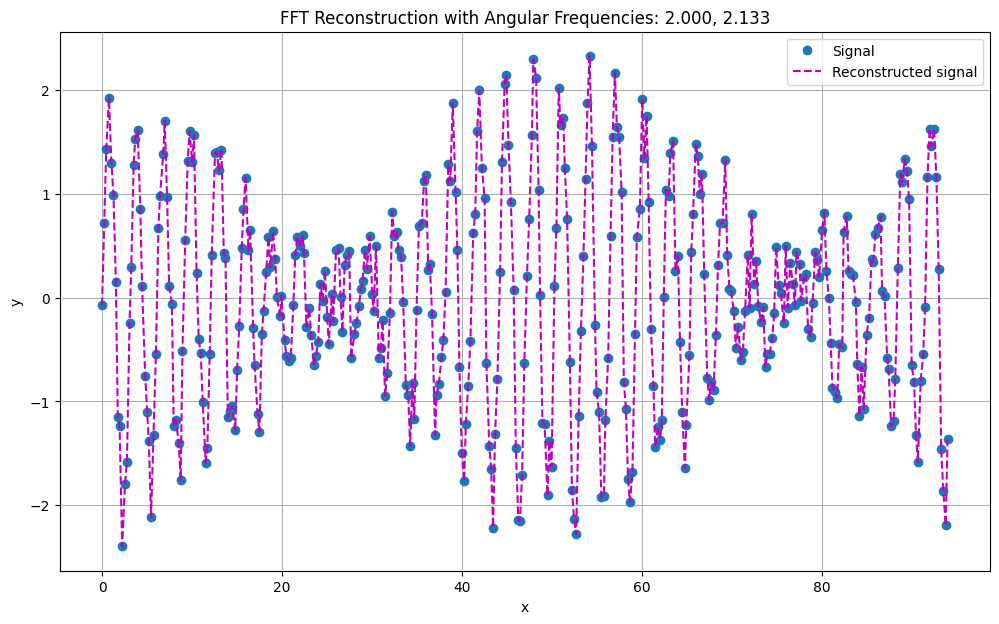

In [ ]:

recon_signal = np.fft.ifft(fft_result).real
#inverse fft only real values


### Figure time ###

plt.figure(figsize = (12,7))
plt.plot(x, y, 'o', label='Signal')#Raw

#reconstructed signal
plt.plot(x, recon_signal, linestyle='--',
         color='m', label='Reconstructed signal')


plt.xlabel('x')
plt.ylabel('y')
plt.title('FFT Reconstruction with Angular Frequencies: {:.3f}, {:.3f}'
          .format(max_omega[0], max_omega[1]))

plt.grid()

plt.legend()
plt.show()

## **QUESTION 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

#defining constants
a = 2
b = 3

k_maxs = [2, 4, 20, 40]
#k array


def calculate_temperature(x, y, k_max):
    '''
    Input:
    x: x array
    y: y array
    k_max: array of k values to test

    Output:
    Const*temp: final temp array
    '''
    temperature = 0 #initializing temp

    for k in range(1, k_max + 1):
      #loop to calculate temp
        const = 2*k-1
        temperature += ((np.sin(const * np.pi * x / a) * np.sinh(const * np.pi * y / a)))/ (const*(np.sinh(const * np.pi*b/a)))
    return (4/np.pi)*temperature # multiplication by const in the end




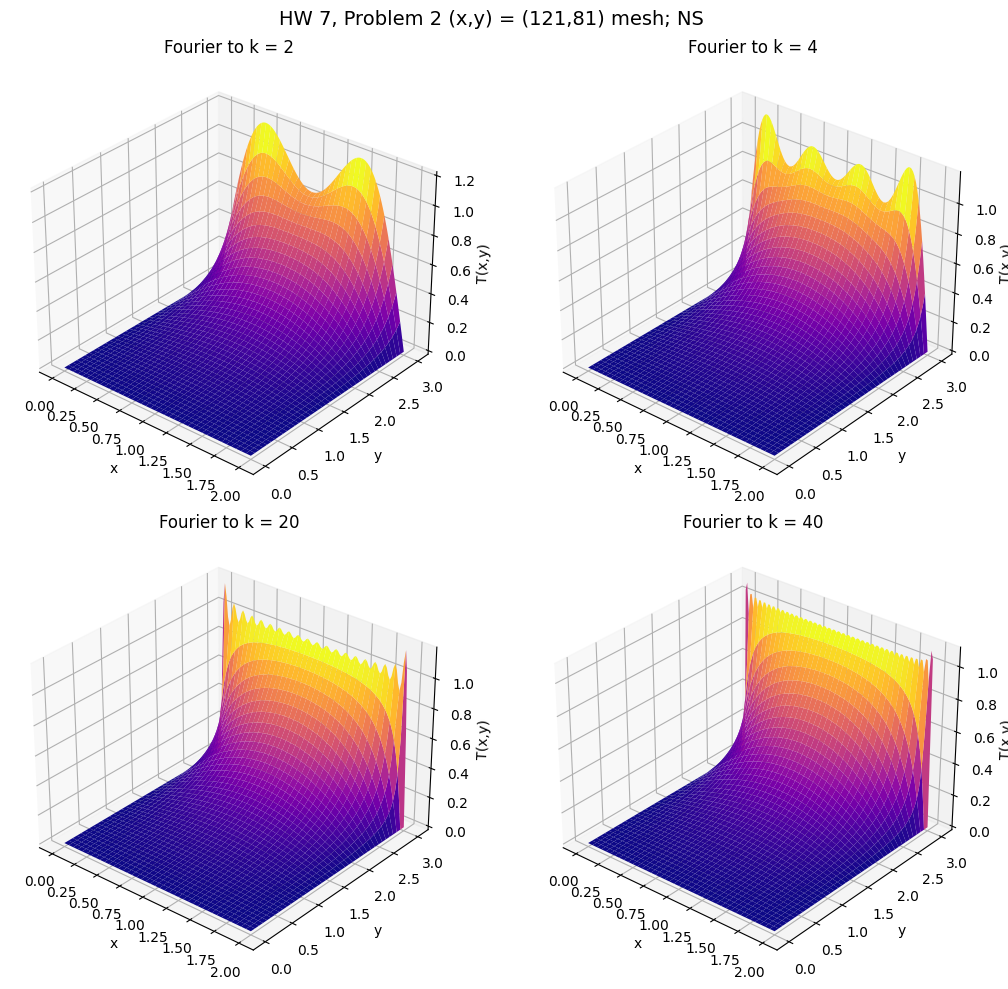

In [ ]:
x = np.linspace(0, a, 121) # 121 points
y = np.linspace(0, b, 81) #81 points

X, Y = np.meshgrid(x, y) #meshgrid


### Figure time ###

fig = plt.figure(figsize=(11, 10))

for i, k_max in enumerate(k_maxs, 1):

  # Loop plots subplots and calculates temp using func
  # for each

    ax = fig.add_subplot(2, 2, i, projection='3d')

    Z = calculate_temperature(X, Y, k_max)#calling func

    surf = ax.plot_surface(X, Y, Z, cmap='plasma')
    ax.set_title(f'Fourier to k = {k_max}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('T(x,y)', labelpad= 0.5)
    ax.view_init(elev=30, azim=310) # rotation purpose (courtesy GPT)


plt.suptitle('HW 7, Problem 2 (x,y) = (121,81) mesh; NS', fontsize=14)
plt.tight_layout()
plt.show()

## **QUESTION 3**

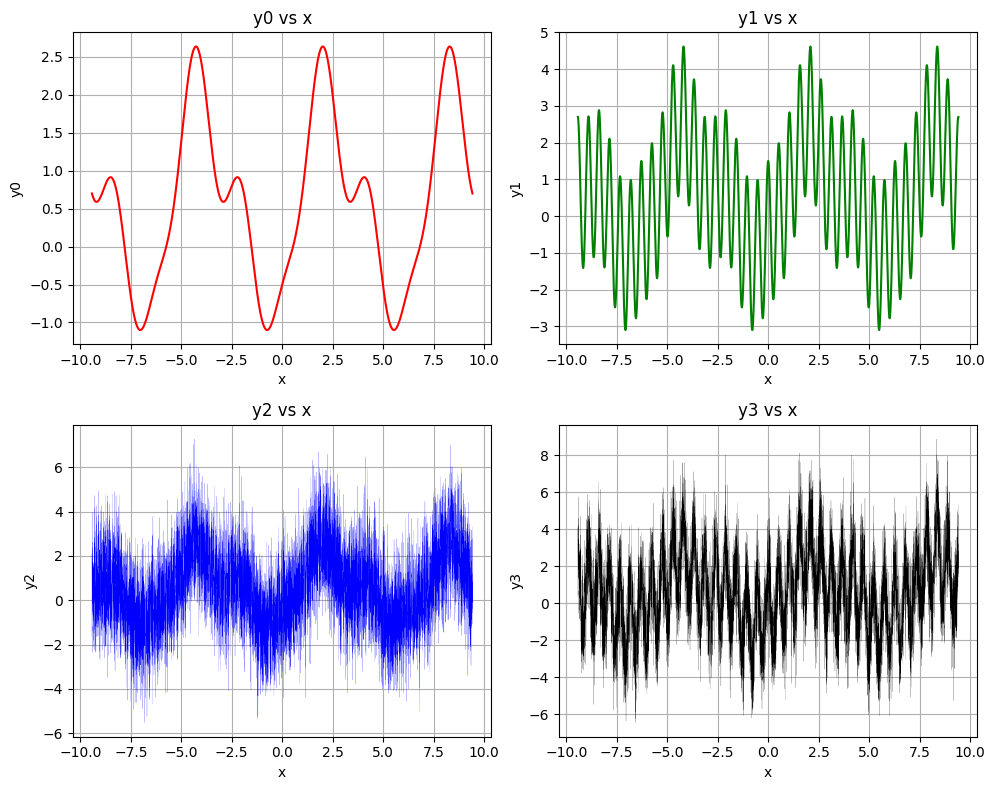

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data loading
data = np.loadtxt('/content/drive/MyDrive/Prob3_Data.txt')

#print(data)

#assigning data
x = data[:, 0]
y0 = data[:, 1]
y1 = data[:,2]
y2 = data[:, 3]
y3 = data[:,4]

#print(y0.shape)

#test plot

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#y0
axs[0, 0].plot(x, y0, color='r')
axs[0, 0].set_title('y0 vs x')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y0')
axs[0, 0].grid()

#y1
axs[0, 1].plot(x, y1, color='g')
axs[0, 1].set_title('y1 vs x')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y1')
axs[0, 1].grid()

#y2
axs[1, 0].plot(x, y2, color='b', linewidth = 0.09)
axs[1, 0].set_title('y2 vs x')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y2')
axs[1, 0].grid()

#y3
axs[1, 1].plot(x, y3, color='k', linewidth = 0.09)
axs[1, 1].set_title('y3 vs x')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y3')
axs[1, 1].grid()

plt.tight_layout()
plt.show()

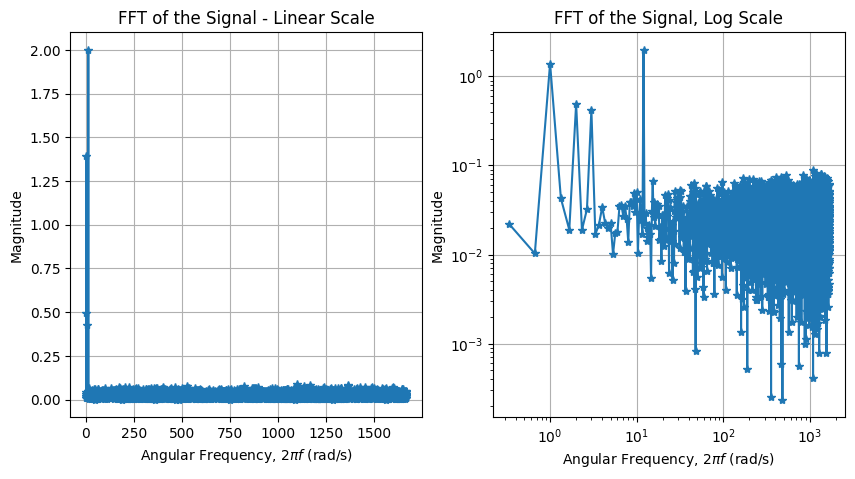

In [ ]:
#fft_result = np.fft.fft(y3) - just playing around with np

fft_result = fft(y3)
freq = fftfreq(len(y3), d=(x[1]-x[0]))

L = np.arange(1, len(x) // 2)

fft_mag = 2*np.abs(fft_result[L])/len(y3)
omega = 2*np.pi*freq[L]

fig, axs = plt.subplots(1,2, figsize=(10, 5))

# Plotting the first subplot (linear scale)
axs[0].plot(omega, fft_mag, '-*')
axs[0].set_xlabel('Angular Frequency, $2\pi f$ (rad/s)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('FFT of the Signal - Linear Scale')
axs[0].grid()

# Plotting the second subplot (log-log scale)
axs[1].loglog(omega, fft_mag, '-*')
axs[1].set_xlabel('Angular Frequency, $2\pi f$ (rad/s)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('FFT of the Signal, Log Scale')
axs[1].grid()

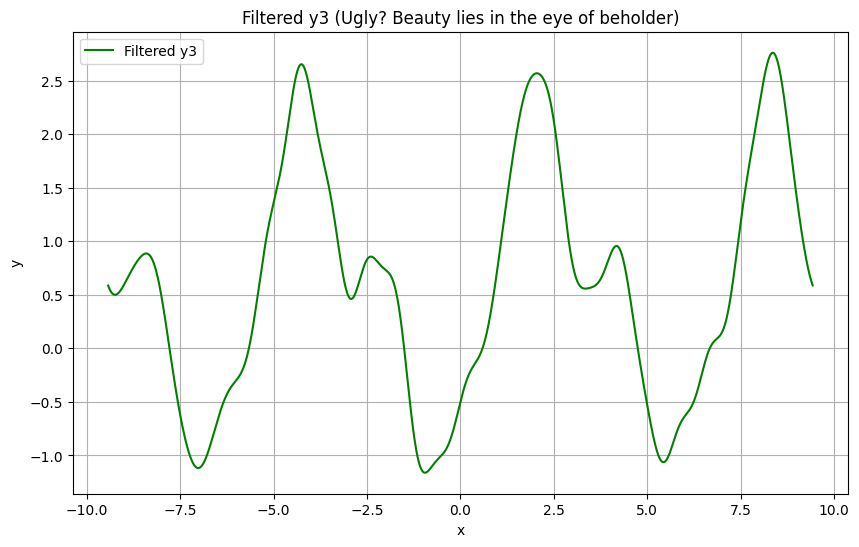

In [ ]:

fft_filtered = np.copy(fft_result)

#filtered fft without freqs above 2*pi/8
fft_filtered[np.abs(2*np.pi*freq) > 8.0] = 0

y_filtered = ifft(fft_filtered).real


plt.figure(figsize=(10, 6))
plt.plot(x, y_filtered, label='Filtered y3', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Filtered y3 (Ugly? Beauty lies in the eye of beholder)')
plt.legend()
plt.grid(True)
plt.show()

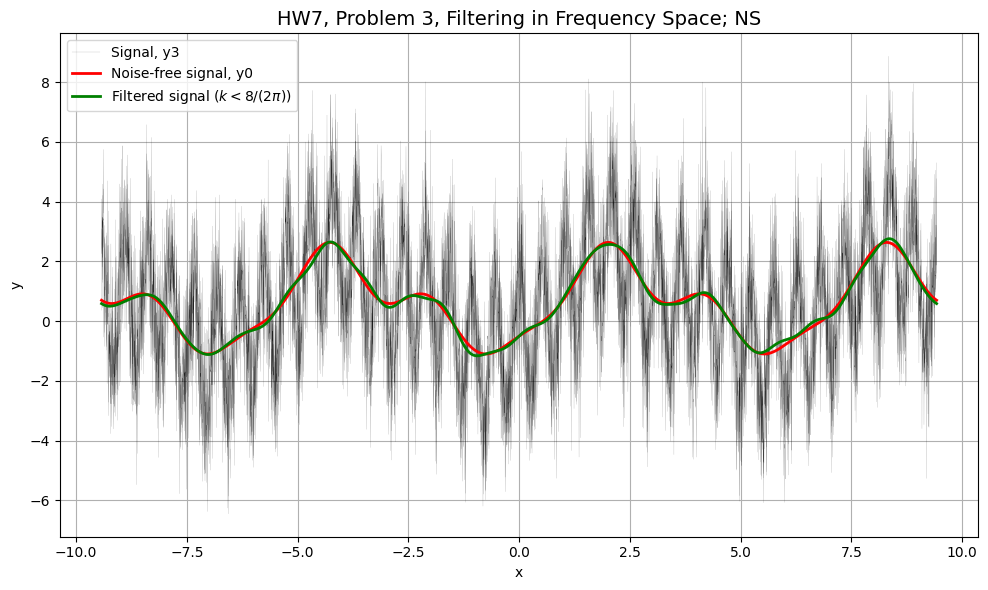

In [ ]:

# y3
plt.figure(figsize = (10,6))
plt.plot(x, y3, label='Signal, y3', color='k', linewidth = 0.07)

# "pure" signal
plt.plot(x, y0, label='Noise-free signal, y0', color='r', linewidth = 2)

#filtered y3
plt.plot(x, y_filtered, label='Filtered signal $(k<8/(2{\pi}))$', color='g', linewidth = 2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('HW7, Problem 3, Filtering in Frequency Space; NS', fontsize = 14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **QUESTION 4**

In [ ]:
#loading and printing
data = np.loadtxt('/content/drive/MyDrive/Prob4_TurntableExpt.txt')

print(data)

[[ 0.00000000e+00  2.34216389e+01 -2.87878441e-02  3.21734000e-01]
 [ 2.00000000e-02  2.33489851e+01 -2.48510767e-02  3.21905500e-01]
 [ 4.00000000e-02  2.33489851e+01 -2.09143092e-02  3.22077000e-01]
 ...
 [ 2.99600000e+01  2.33257333e+01 -3.29706595e-02  2.73028000e-01]
 [ 2.99800000e+01  2.33257333e+01 -2.87878441e-02  2.73885500e-01]
 [ 3.00000000e+01  2.33489851e+01 -2.87878441e-02  2.75600500e-01]]


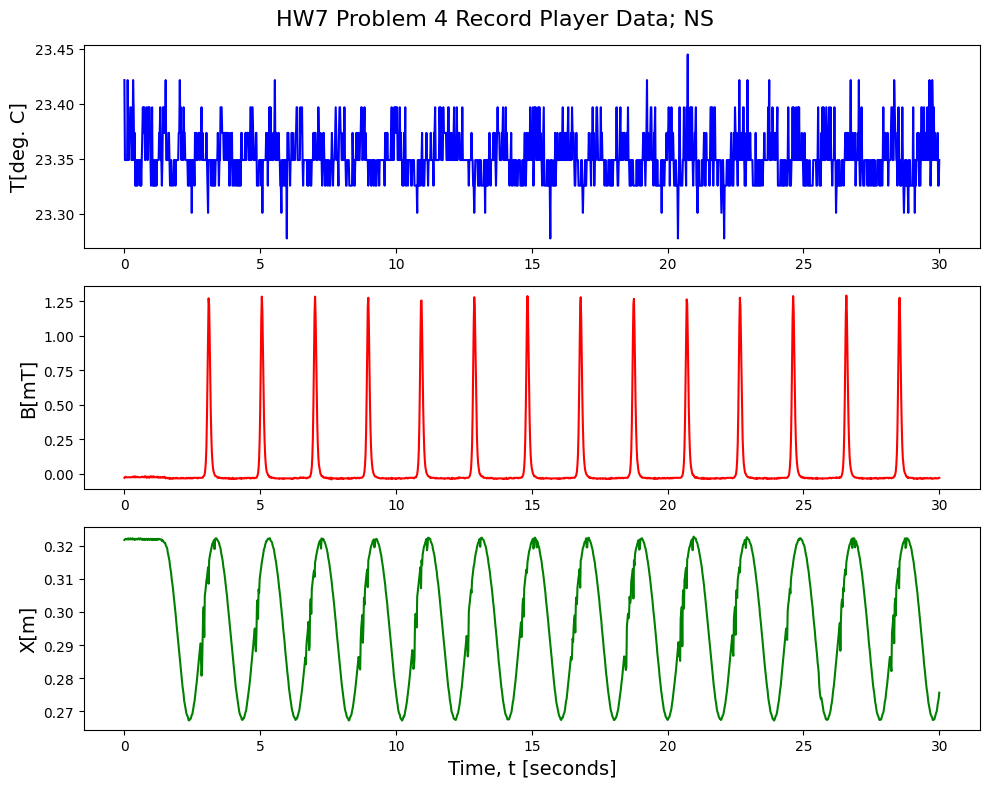

In [ ]:
#assigning data

time = data[:, 0]
temp = data[:, 1]
magnet = data[:,2]
dist = data[:, 3]

### Figure ###

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Temperature
axs[0].plot(time, temp, color='b')
axs[0].set_ylabel('T[deg. C]', fontsize=14)

#Magnetic field
axs[1].plot(time, magnet, color='r')
axs[1].set_ylabel('B[mT]', fontsize=14)

#Distance
axs[2].plot(time, dist, color='g')
axs[2].set_xlabel('Time, t [seconds]', fontsize=14)

axs[2].set_ylabel('X[m]', fontsize=14)

plt.suptitle('HW7 Problem 4 Record Player Data; NS', fontsize=16)

plt.tight_layout()

plt.show()

## **WITHOUT FILTERING FIRST FEW DATAPOINTS**

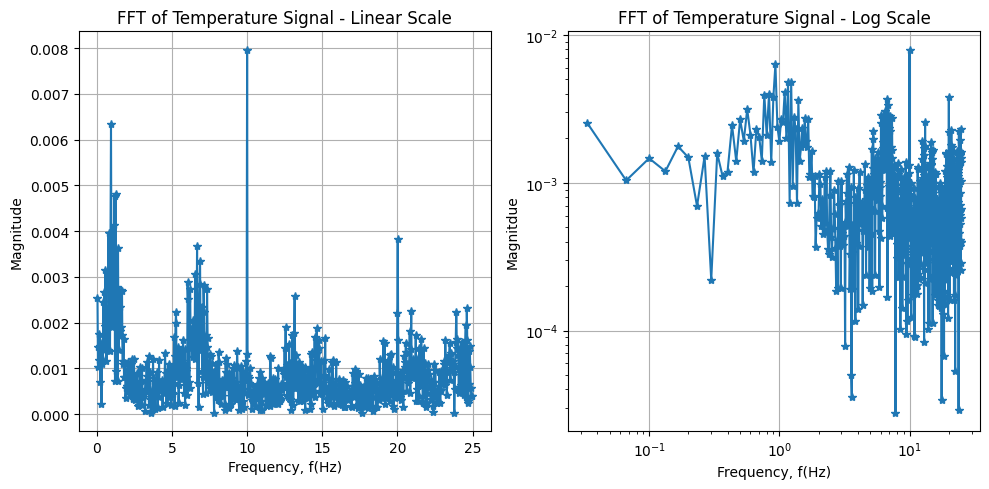

In [ ]:
fft = np.fft.fft(temp, len(time))
amp = 2*np.abs(fft)/len(temp)

#sampling freq
fs = (time[-1] - time[0])/(len(time)-1)


freq = np.fft.fftfreq(len(time), fs) #Hz


#positive frequencies
L = np.arange(1, len(time) // 2)

### Temp FFT Figure ###

fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(freq[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(Hz)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('FFT of Temperature Signal - Linear Scale')
axs[0].grid()

axs[1].loglog(freq[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(Hz)')
axs[1].set_ylabel('Magnitdue')
axs[1].set_title('FFT of Temperature Signal - Log Scale')
axs[1].grid()

plt.tight_layout()


plt.show()

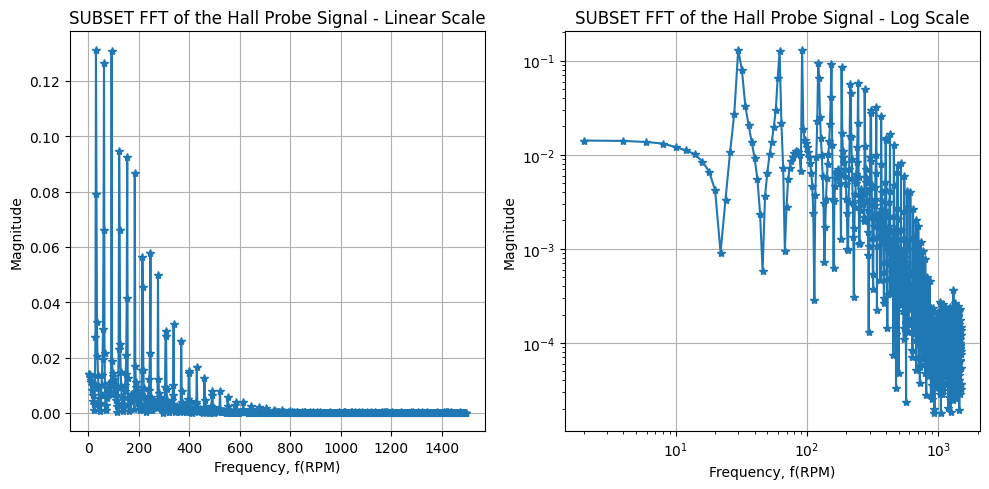

Peak Frequency: [29.98001332]


In [ ]:
### Mag field FFT ###
fft = np.fft.fft(magnet, len(time))
amp = 2*np.abs(fft)/(len(magnet))



freq = fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive frequencies
L = np.arange(1, len(time) // 2)

### Mag FFT ###
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(freq_rpm[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(RPM)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('SUBSET FFT of the Hall Probe Signal - Linear Scale')
axs[0].grid()



axs[1].loglog(freq_rpm[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(RPM)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('SUBSET FFT of the Hall Probe Signal - Log Scale')
axs[1].grid()


plt.tight_layout()


plt.show()

#peak freq
peak_indices = np.argsort(amp[L])[-1:]
peak_frequency = freq_rpm[L][peak_indices]

print('Peak Frequency:',peak_frequency)

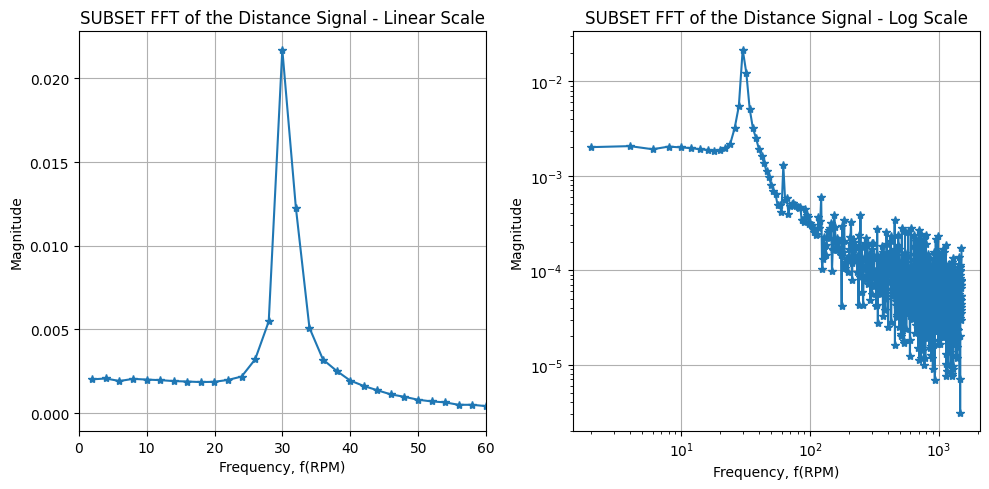

Peak Frequency: [29.98001332]


In [ ]:
### Distance ###
fft = np.fft.fft(dist, len(time))
amp = 2*np.abs(fft)/(len(dist))



freq = fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive frequencies
L = np.arange(1, len(time) // 2)


fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].plot(freq_rpm[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(RPM)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('SUBSET FFT of the Distance Signal - Linear Scale')
axs[0].set_xlim(0, 60)
axs[0].grid()



axs[1].loglog(freq_rpm[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(RPM)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('SUBSET FFT of the Distance Signal - Log Scale')
axs[1].grid()


plt.tight_layout()


plt.show()

peak_indices = np.argsort(amp[L])[-1:]
peak_frequency = freq_rpm[L][peak_indices]

print('Peak Frequency:',peak_frequency)

## **FILTERING OUT "DATA" POINTS IN THE START**

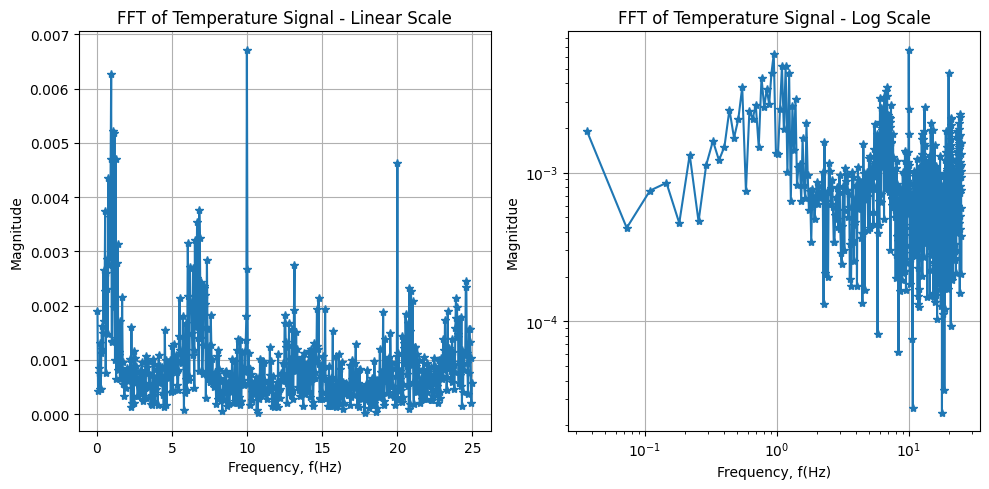

In [ ]:
idx_start = 129 #420
#trial and error
# the gods have blessed me with this index



time = time[idx_start:]
temp = temp[idx_start:]


fhat = np.fft.fft(temp, len(time))
amp = 2*np.abs(fhat)/len(temp)

fs = (time[-1] - time[0])/(len(time)-1)


freq = np.fft.fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive frequencies
L = np.arange(1, len(time) // 2)


fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].plot(freq[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(Hz)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('FFT of Temperature Signal - Linear Scale')
axs[0].grid()

axs[1].loglog(freq[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(Hz)')
axs[1].set_ylabel('Magnitdue')
axs[1].set_title('FFT of Temperature Signal - Log Scale')
axs[1].grid()

plt.tight_layout()


plt.show()

Peak Frequency: [30.6122449]


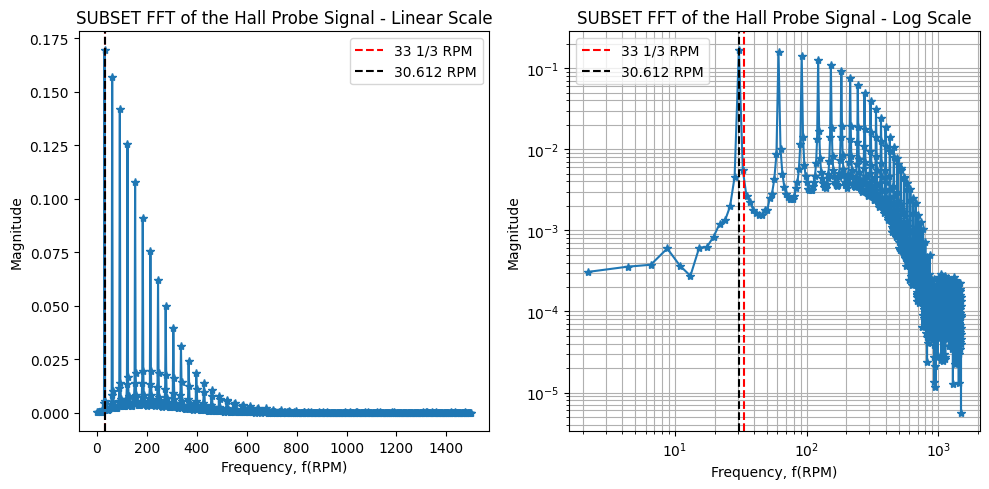

In [ ]:
magnet = magnet[idx_start:]
### Mag field FFT ###
fft = np.fft.fft(magnet, len(time))
amp = 2*np.abs(fft)/(len(magnet))



freq = fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive frequencies
L = np.arange(1, len(time) // 2)


#peak freq
peak_indices = np.argsort(amp[L])[-1:]
peak_freq = freq_rpm[L][peak_indices]

print('Peak Frequency:',peak_freq)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].plot(freq_rpm[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(RPM)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('SUBSET FFT of the Hall Probe Signal - Linear Scale')
axs[0].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[0].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )
axs[0].grid()
axs[0].legend()
axs[0].grid()

axs[1].loglog(freq_rpm[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(RPM)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('SUBSET FFT of the Hall Probe Signal - Log Scale')
axs[1].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[1].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )

axs[1].legend()
axs[1].grid(which = 'both')

plt.tight_layout()


plt.show()


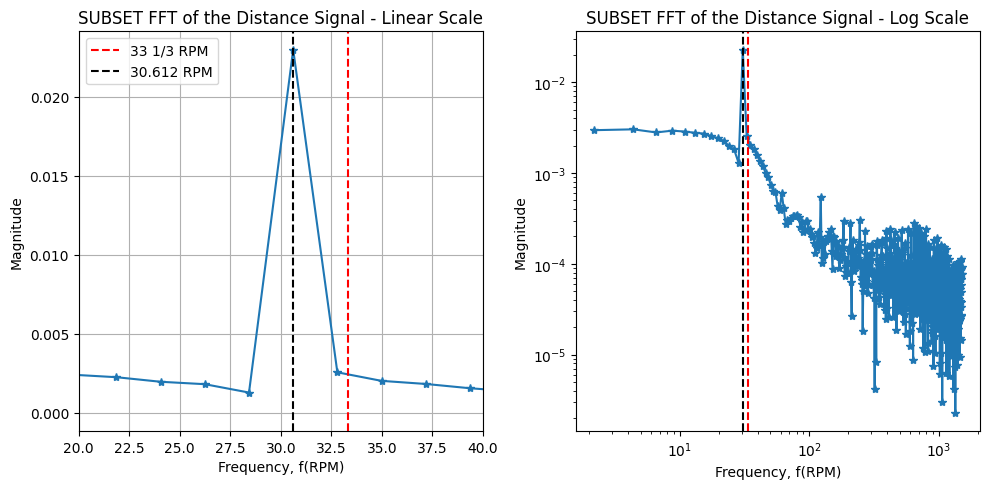

Peak Frequency: [30.6122449]


In [ ]:
dist = dist[idx_start:]
fhat = np.fft.fft(dist, len(time))
#fhat cause watched this video for some help
#https://www.youtube.com/watch?v=s2K1JfNR7Sc

amp = 2*np.abs(fhat)/len(dist)

freq = np.fft.fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive freq
L = np.arange(1, len(time) // 2)


fig, axs = plt.subplots(1,2, figsize=(10, 5))


axs[0].plot(freq_rpm[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(RPM)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('SUBSET FFT of the Distance Signal - Linear Scale')
axs[0].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[0].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )
axs[0].set_xlim(20,40)
axs[0].legend()
axs[0].grid()

axs[1].loglog(freq_rpm[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(RPM)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('SUBSET FFT of the Distance Signal - Log Scale')
axs[1].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[1].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )



plt.tight_layout()


plt.show()

#peak freq
peak_indices = np.argsort(amp[L])[-1:]
peak_frequency = freq_rpm[L][peak_indices]

print('Peak Frequency:',peak_frequency)

## **TIME AS INT VALUES WITH FILTERING**

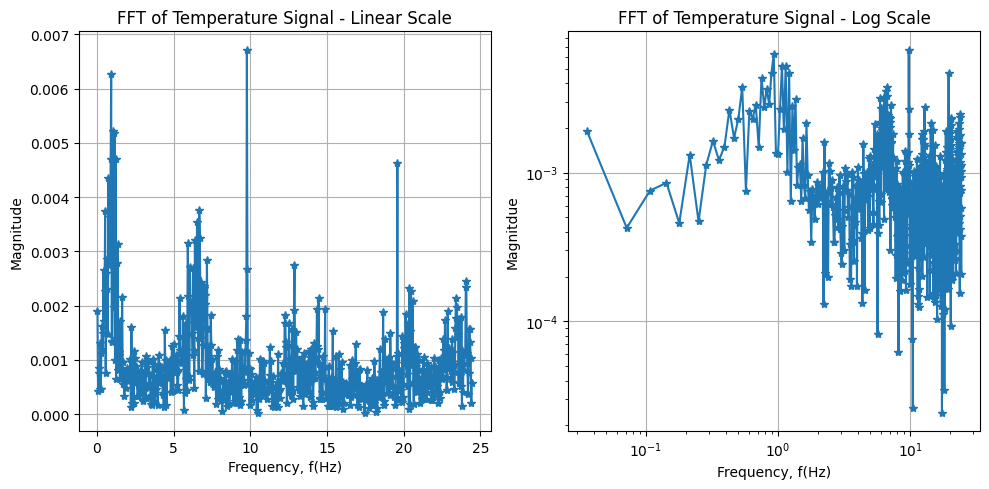

In [ ]:
time = time.astype(int)


fhat = np.fft.fft(temp, len(time))


amp = 2*np.abs(fhat)/len(temp)

# sampling freq
fs = (time[-1] - time[0])/(len(time)-1)


freq = np.fft.fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive freq
L = np.arange(1, len(time) // 2)


fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].plot(freq[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(Hz)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('FFT of Temperature Signal - Linear Scale')
axs[0].grid()

axs[1].loglog(freq[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(Hz)')
axs[1].set_ylabel('Magnitdue')
axs[1].set_title('FFT of Temperature Signal - Log Scale')
axs[1].grid()

plt.tight_layout()


plt.show()

Peak Frequency: [29.97813411]


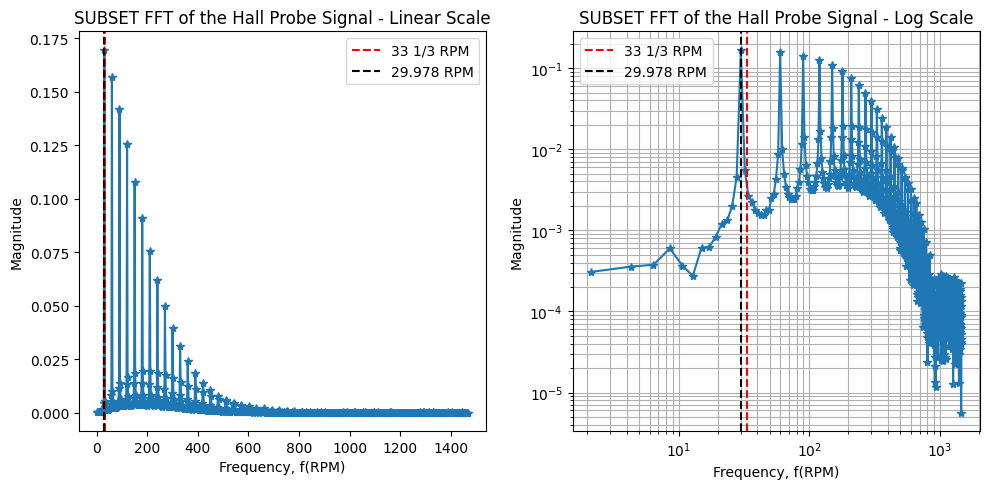

In [ ]:
fft = np.fft.fft(magnet, len(time))
amp = 2*np.abs(fft)/(len(magnet))



freq = fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive frequencies
L = np.arange(1, len(time) // 2)


#peak freq
peak_indices = np.argsort(amp[L])[-1:]
peak_freq = freq_rpm[L][peak_indices]

print('Peak Frequency:',peak_freq)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].plot(freq_rpm[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(RPM)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('SUBSET FFT of the Hall Probe Signal - Linear Scale')
axs[0].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[0].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )
axs[0].grid()
axs[0].legend()
axs[0].grid()

axs[1].loglog(freq_rpm[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(RPM)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('SUBSET FFT of the Hall Probe Signal - Log Scale')
axs[1].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[1].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )

axs[1].legend()
axs[1].grid(which = 'both')

plt.tight_layout()


plt.show()


Peak Frequency: [29.97813411]


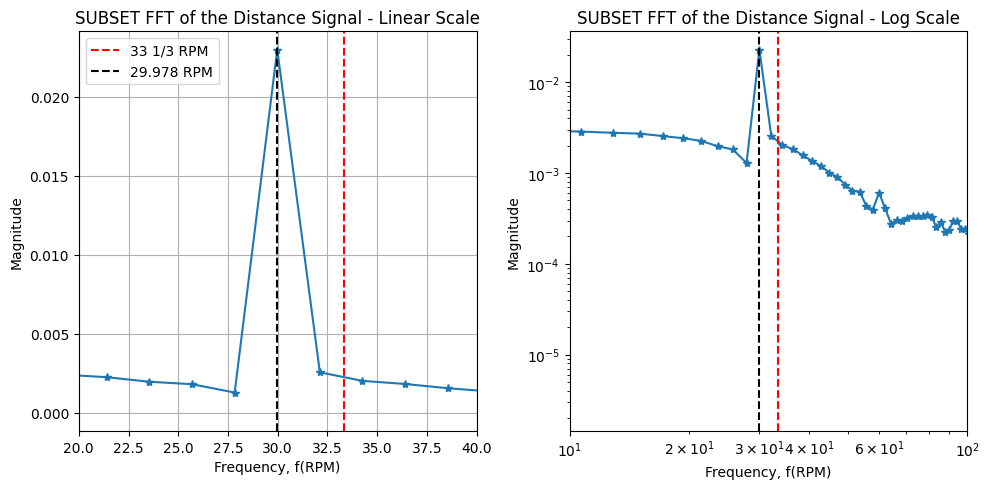

In [ ]:
### dist ###
fhat = np.fft.fft(dist, len(time))
amp = 2*np.abs(fhat)/len(dist)
# Compute time span
dt = time[-1] - time[0]


freq = np.fft.fftfreq(len(time), fs) #Hz

# Convert Hz to RPM
freq_rpm = (freq) * 60

# positive freq
L = np.arange(1, len(time) // 2)

#peak freq
peak_indices = np.argsort(amp[L])[-1:]
peak_freq = freq_rpm[L][peak_indices]

print('Peak Frequency:',peak_freq)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].plot(freq_rpm[L], amp[L], marker='*')
axs[0].set_xlabel('Frequency, f(RPM)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('SUBSET FFT of the Distance Signal - Linear Scale')
axs[0].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[0].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )
axs[0].set_xlim(20,40)
axs[0].legend()
axs[0].grid()

axs[1].loglog(freq_rpm[L], amp[L], marker='*')
axs[1].set_xlabel('Frequency, f(RPM)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('SUBSET FFT of the Distance Signal - Log Scale')
axs[1].axvline(x=33.33, color='r', linestyle='--', label = '33 1/3 RPM')
axs[1].axvline(x= peak_freq, color='k', linestyle='--', label = '{:.3f} RPM'.format(peak_freq[0]) )
axs[1].set_xlim(10, 100)



plt.tight_layout()


plt.show()

